<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.252348,31.504218,74.440878,0.017216,149.214659,149.189375,0.025285
1,0.0,1.0,66.284302,54.806051,84.058942,0.045870,215.195164,215.144062,0.051101
2,0.0,2.0,63.469968,74.488289,64.539510,-0.040218,212.457550,212.491066,-0.033516
3,0.0,3.0,39.201596,89.480085,50.916529,0.003595,189.601806,189.589419,0.012387
4,0.0,4.0,61.972473,68.876183,51.615252,0.023562,192.487469,192.455927,0.031542
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,98.931356,73.296962,48.934728,0.025590,231.188637,231.170055,0.018581
19996,999.0,16.0,23.066222,86.242114,41.373121,-0.020637,160.660820,160.670264,-0.009445
19997,999.0,17.0,63.307390,39.606743,41.442337,-0.054443,154.302027,154.374175,-0.072147
19998,999.0,18.0,30.013594,77.097827,21.114376,-0.023797,138.202000,138.236569,-0.034569


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.252348  31.504218  74.440878  ...  149.214659  149.189375  0.025285
      1.0    66.284302  54.806051  84.058942  ...  215.195164  215.144062  0.051101
      2.0    63.469968  74.488289  64.539510  ...  212.457550  212.491066 -0.033516
      3.0    39.201596  89.480085  50.916529  ...  189.601806  189.589419  0.012387
      4.0    61.972473  68.876183  51.615252  ...  192.487469  192.455927  0.031542
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   98.931356  73.296962  48.934728  ...  231.188637  231.170055  0.018581
      16.0   23.066222  86.242114  41.373121  ...  160.660820  160.670264 -0.009445
      17.0   63.307390  39.606743  41.442337  ...  154.302027  154.374175 -0.072147
      18.0   30.013594  77.097827  21.114376  ...  138.202000  138.236569 -0.034569
      19.0   76.105205  34.828412  39.865643  ...  160.956138  160.823407  0.132731

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.252348  31.504218  74.440878  ...  149.214659  149.189375  0.025285
      1.0    66.284302  54.806051  84.058942  ...  215.195164  215.144062  0.051101
      2.0    63.469968  74.488289  64.539510  ...  212.457550  212.491066 -0.033516
      3.0    39.201596  89.480085  50.916529  ...  189.601806  189.589419  0.012387
      4.0    61.972473  68.876183  51.615252  ...  192.487469  192.455927  0.031542
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   98.931356  73.296962  48.934728  ...  231.188637  231.170055  0.018581
      16.0   23.066222  86.242114  41.373121  ...  160.660820  160.670264 -0.009445
      17.0   63.307390  39.606743  41.442337  ...  154.302027  154.374175 -0.072147
      18.0   30.013594  77.097827  21.114376  ...  138.202000  138.236569 -0.034569
      19.0   76.105205  34.828412  39.865643  ...  160.956138  160.823407  0.132731

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.252348,31.504218,74.440878,0.017216,149.214659,149.189375,0.025285
1,0.0,1.0,66.284302,54.806051,84.058942,0.045870,215.195164,215.144062,0.051101
2,0.0,2.0,63.469968,74.488289,64.539510,-0.040218,212.457550,212.491066,-0.033516
3,0.0,3.0,39.201596,89.480085,50.916529,0.003595,189.601806,189.589419,0.012387
4,0.0,4.0,61.972473,68.876183,51.615252,0.023562,192.487469,192.455927,0.031542
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,98.931356,73.296962,48.934728,0.025590,231.188637,231.170055,0.018581
19996,999.0,16.0,23.066222,86.242114,41.373121,-0.020637,160.660820,160.670264,-0.009445
19997,999.0,17.0,63.307390,39.606743,41.442337,-0.054443,154.302027,154.374175,-0.072147
19998,999.0,18.0,30.013594,77.097827,21.114376,-0.023797,138.202000,138.236569,-0.034569


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.252348  31.504218  74.440878  ...  149.214659  149.189375  0.025285
      1.0    66.284302  54.806051  84.058942  ...  215.195164  215.144062  0.051101
      2.0    63.469968  74.488289  64.539510  ...  212.457550  212.491066 -0.033516
      3.0    39.201596  89.480085  50.916529  ...  189.601806  189.589419  0.012387
      4.0    61.972473  68.876183  51.615252  ...  192.487469  192.455927  0.031542
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   98.931356  73.296962  48.934728  ...  231.188637  231.170055  0.018581
      16.0   23.066222  86.242114  41.373121  ...  160.660820  160.670264 -0.009445
      17.0   63.307390  39.606743  41.442337  ...  154.302027  154.374175 -0.072147
      18.0   30.013594  77.097827  21.114376  ...  138.202000  138.236569 -0.034569
      19.0   76.105205  34.828412  39.865643  ...  160.956138  160.823407  0.132731

[20000 rows x 7 columns]

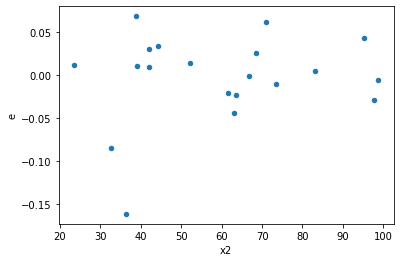

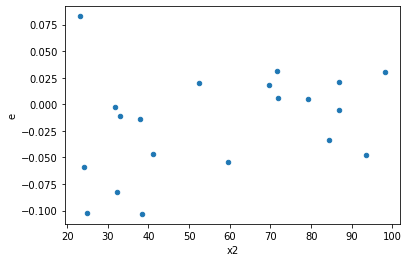

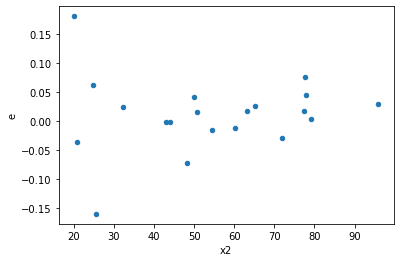

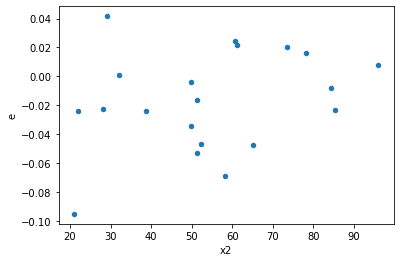

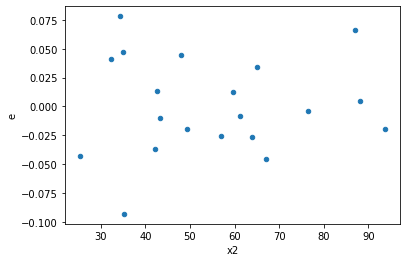

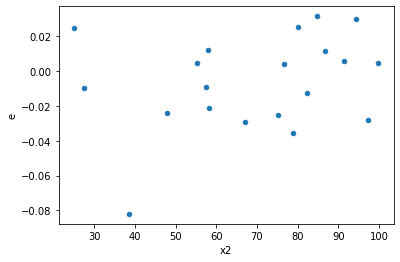

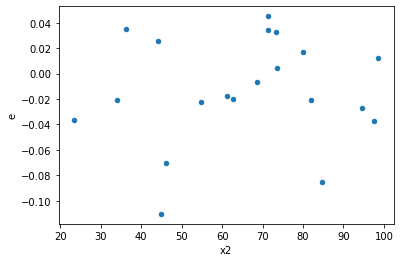

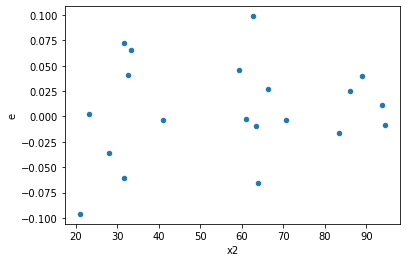

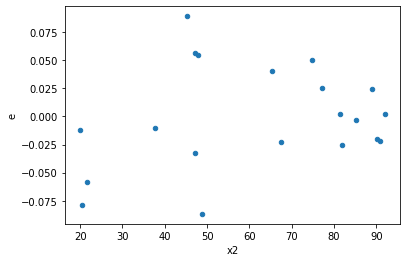

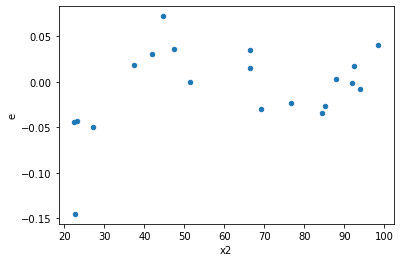

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero 

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,5.0,9.0,0.004305592527951261,0.010928275208668514,0.0010763981319878153,0.0013660344010835643,1.4100879183067383,0.7369042883763397,0.6315478558118301,Reject005=1 : Homoscedasticity
7.0,10.0,4.0,0.012642161315421674,0.018450822529837433,0.0014046845906024081,0.006150274176612478,3.6486685443829137,0.08816397398013964,0.9559180130099302,Reject005=1 : Homoscedasticity
8.0,9.0,5.0,0.019530662581841045,0.018467938388072144,0.0024413328227301306,0.004616984597018036,1.7020563925689558,0.4597761398122886,0.7701119300938557,Reject005=1 : Homoscedasticity
11.0,7.0,7.0,0.006473616038101929,0.011117041612947638,0.0010789360063503215,0.0018528402688246064,1.7172846748271413,0.49249761951853754,0.7537511902407312,Reject005=1 : Homoscedasticity
13.0,5.0,9.0,0.003536759222121284,0.012542788076010126,0.000884189805530321,0.0015678485095012658,1.9702261760425959,0.47110615001455347,0.7644469249927233,Reject005=1 : Homoscedasticity
14.0,7.0,7.0,0.0077700801713925256,0.017972367591622934,0.0012950133618987543,0.0029953945986038225,2.313022156166761,0.2909723722580613,0.8545138138709694,Reject005=1 : Homoscedasticity
16.0,7.0,7.0,0.006542441685579636,0.015073636693251192,0.001090406947596606,0.002512272782208532,2.303977233220952,0.293172883742002,0.853413558128999,Reject005=1 : Homoscedasticity
18.0,7.0,7.0,0.009024418778932751,0.023561603949730434,0.0015040697964887918,0.003926933991621739,2.610872182121504,0.22873334200538387,0.8856333289973081,Reject005=1 : Homoscedasticity
20.0,11.0,3.0,0.008743916948446912,0.008040994578439348,0.0008743916948446912,0.004020497289219674,3.3719038002582815,0.11666533608620111,0.9416673319568994,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,10.0,0.007350150756737435,0.010830243813548227,0.0024500502522458115,0.0012033604237275807,0.5893889348389652,0.45333579849860206,Reject005=1 : Homoscedasticity
1.0,5.0,9.0,0.004305592527951261,0.010928275208668514,0.0010763981319878153,0.0013660344010835643,1.4100879183067383,1.2630957116236603,Reject005=1 : Homoscedasticity
2.0,6.0,8.0,0.04076327860589951,0.003981623982387878,0.008152655721179902,0.0005688034260554111,0.07325755162291397,0.001623117285800978,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,0.027458531985499413,0.004309009431230085,0.004576421997583235,0.0007181682385383475,0.1569278879695984,0.025945543983382946,Reject005=0 : Heteroscedasticity
4.0,8.0,6.0,0.006106655614056118,0.002136428504948968,0.0008723793734365884,0.0004272857009897936,0.46646995015982246,0.36843215294353027,Reject005=1 : Homoscedasticity
5.0,7.0,7.0,0.023039904363256945,0.000497766417813442,0.003839984060542824,8.296106963557367e-05,0.021604534895867823,4.915462360984891e-05,Reject005=0 : Heteroscedasticity
6.0,7.0,7.0,0.013623321993496952,0.01098084177936786,0.002270553665582825,0.00183014029656131,0.8060326097121927,0.78329928477067,Reject005=1 : Homoscedasticity
7.0,10.0,4.0,0.012642161315421674,0.018450822529837433,0.0014046845906024081,0.006150274176612478,3.6486685443829137,0.08816397398013964,Reject005=1 : Homoscedasticity
8.0,9.0,5.0,0.019530662581841045,0.018467938388072144,0.0024413328227301306,0.004616984597018036,1.7020563925689558,0.4597761398122886,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      787
Reject005=0 : Heteroscedasticity    213
Name: Result_test, dtype: int64